In [6]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [7]:
class SIRModel():
    
    def __init__(self, beta_init=0.2,gamma_init=1./10):
        self.beta_0 = beta_init
        self.gamma_0 = gamma_init
        self.beta_ = None
        self.gamma_ = None

    def fit(self,x,y):
        return self

    def predict(self,t):
        return S, I, R

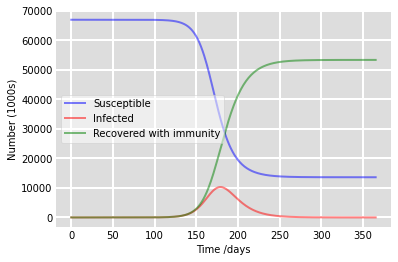

In [8]:
# Total population in France, N.
N = 67e6
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0,365,365)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [39]:
Updates_NC = pd.read_csv('hospitaliere_new.csv',sep=';')
paris = Updates_NC[Updates_NC['dep']=="75"]
paris.groupby('jour')['incid_hosp'].sum()

jour
2020-03-19    165
2020-03-20    120
2020-03-21    141
2020-03-22    154
2020-03-23    185
2020-03-24    209
2020-03-25    318
2020-03-26    285
2020-03-27    275
2020-03-28    349
2020-03-29    243
2020-03-30    254
2020-03-31    410
2020-04-01    386
2020-04-02    347
2020-04-03    296
2020-04-04    289
2020-04-05    233
2020-04-06    232
2020-04-07    240
2020-04-08    244
2020-04-09    241
2020-04-10    293
2020-04-11    221
2020-04-12    173
2020-04-13    133
2020-04-14    128
2020-04-15    155
2020-04-16    157
2020-04-17    205
2020-04-18    131
2020-04-19     60
2020-04-20    117
2020-04-21    131
2020-04-22     92
2020-04-23     84
2020-04-24     65
2020-04-25     71
2020-04-26     51
2020-04-27     56
2020-04-28     90
2020-04-29    109
2020-04-30     79
2020-05-01     42
2020-05-02     33
2020-05-03     25
2020-05-04     41
2020-05-05     79
Name: incid_hosp, dtype: int64

In [38]:
class preProcess():
    def __init__(self):
        self.paris = Updates_NC[Updates_NC['dep']=="75"]
        parisInfection = self.paris.groupby('jour')['incid_hosp'].sum()
        parisRecovered = self.paris.groupby('jour')['incid_rea'].sum()
        parisDead = self.paris.groupby('jour')['incid_dc'].sum()
        self.paris = {'date':parisInfection.index,'Infected':parisInfection.values,
                     'Recovered':parisRecovered.values,'Death':parisDead.values}
        self.paris = pd.DataFrame(self.paris, index = [i for i in range(parisInfection.shape[0])])
        
    def getTotal(self):
        parisTotalInfection = [self.paris.loc[0:i,'incid_hosp'].sum() for i in range(self.paris.shape[0])]
        parisTotalRecovered = [self.paris.loc[0:i,'incid_rea'].sum() for i in range(self.paris.shape[0])]
        parisTotalDead = [self.paris.loc[0:i,'incid_dc'].sum() for i in range(self.paris.shape[0])]
        self.paris = self.paris.join(pd.DataFrame([parisTotalInfection,parisTotalRecovered,parisTotalDead], index = ['total_hosp', 'total_rea','total_dc']).T)
        print(self.paris) 
        
    def report(self):
        plt.plot(self.paris.index, self.paris['total_hosp'])
        plt.xlabel('Day')
        plt.ylabel('Number of people')
        plt.show()

In [36]:
process=preProcess()
process.getTotal()

KeyError: 'incid_hosp'